## Explaratory Data Analysis Pizza Sale
### By Muhammad Zakry Zoekruf 
### LinkedIn https://www.linkedin.com/in/muhammad-zakry-zoekruf
### Dataset : https://www.kaggle.com/datasets/shilongzhuang/pizza-sales

#### Import package needed to do analysis

In [1]:
import pandas as pd ## package data processing
import numpy as np ## package linear algebra
import matplotlib.pyplot as plt ## package visualiasi data
import seaborn as sns ## package visualisasi data


#### Let see the data looks like!

In [2]:
df = pd.read_excel('Pizza_sales.xlsx') # reading excel file and save to variable 'data'
df.head() #show the first 10 rows of data

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [3]:
df.info() ## show data types and count non null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


In [4]:
df.shape ## show number rows and number of column.(i.e if it shows us (20, 5) meaning there is 20 rows and 5 columns )

(48620, 12)

#### Lets check if there any missing values or null values

In [5]:
df.isna().sum() ## isna() : checking null values in rows, sum() : sum of all null values in each column

order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [6]:
df.duplicated().sum() # Check if there is any duplicate row

0

In [235]:
df['pizza_name'].nunique() # shows number of unique pizza in the dataframe


32

In [227]:
df['pizza_name'].value_counts() #shows number of order by pizza name

The Classic Deluxe Pizza                      2416
The Barbecue Chicken Pizza                    2372
The Hawaiian Pizza                            2370
The Pepperoni Pizza                           2369
The Thai Chicken Pizza                        2315
The California Chicken Pizza                  2302
The Sicilian Pizza                            1887
The Spicy Italian Pizza                       1887
The Southwest Chicken Pizza                   1885
The Four Cheese Pizza                         1850
The Italian Supreme Pizza                     1849
The Big Meat Pizza                            1811
The Vegetables + Vegetables Pizza             1510
The Mexicana Pizza                            1456
The Napolitana Pizza                          1451
The Spinach and Feta Pizza                    1432
The Prosciutto and Arugula Pizza              1428
The Pepper Salami Pizza                       1422
The Italian Capocollo Pizza                   1414
The Greek Pizza                

#### There is 32 Pizza Name in this dataset and most bought pizza is The Classic Deluxe Pizza   

In [91]:
## Create year, month and hour columns to make analysis easier

In [194]:
df['month'] = df['order_date'].dt.strftime("%B") #Make a column with month name
df['month_number'] = df['order_date'].dt.month #Make a column with month number
df['order_day'] = df['order_date'].dt.day_name() #Make a column with day name

df['order_time'] = df['order_time'].astype('string')  #converting order_time column to string type data
df['hour'] = df['order_time'].str.split(':').str[0] #split the data to get only the number of clock
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,month,order_day,hour,month_number,day_number
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,January,Thursday,11,1,1
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,January,Thursday,11,1,1
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,January,Thursday,11,1,1
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,January,Thursday,11,1,1
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,January,Thursday,11,1,1


### Now we have a column to do the analysis 

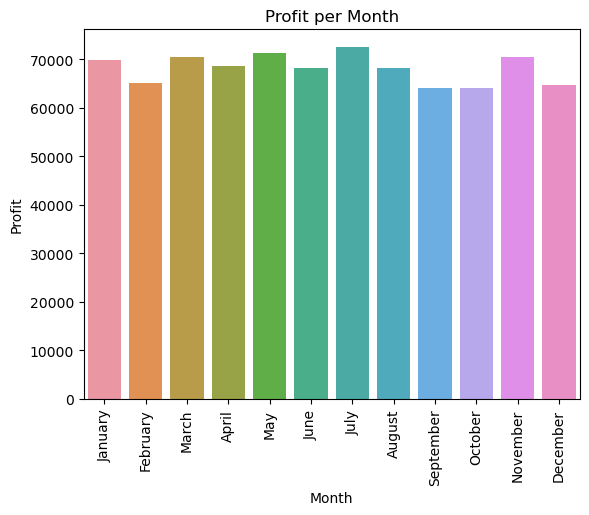

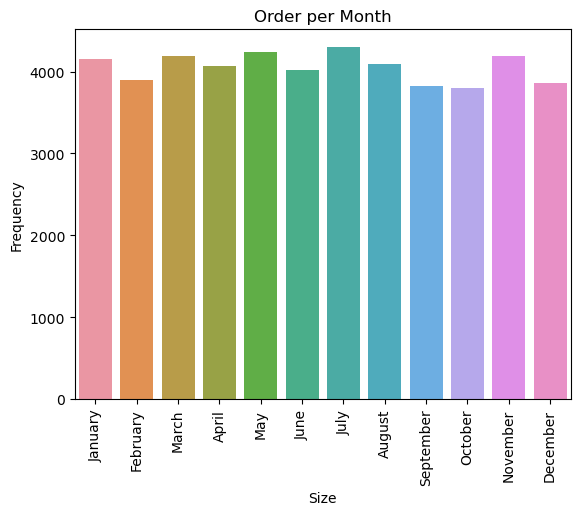

,month_number,month,total_order,total_profit
0,1,January,4156,69793.30
1,2,February,3892,65159.60
2,3,March,4186,70397.10
3,4,April,4067,68736.80
4,5,May,4239,71402.75
5,6,June,4025,68230.20
6,7,July,4301,72557.90
7,8,August,4094,68278.25
8,9,September,3819,64180.05
9,10,October,3797,64027.60


In [236]:
total_order = df.groupby(['month_number','month']).agg(total_order=('order_details_id' ,'count'),
                                                       total_profit=('total_price' , 'sum')).reset_index().sort_values(by='month_number')

grouped_profit = df.groupby(['month_number','month']).sum()['total_price'].reset_index().sort_values('month_number')
sales_by_month = grouped_profit.unstack()
sns.barplot(data=sales_by_month, x='month', y='total_price')
plt.xticks(rotation=90)
plt.xlabel("Month",fontsize=10,color="black")
plt.ylabel("Profit",fontsize=10,color="black")
plt.title("Profit per Month",color="black")
plt.show()
sns.countplot(x='month',data=df)
plt.xticks(rotation=90)
plt.xlabel("Size",fontsize=10,color="black")
plt.ylabel("Frequency",fontsize=10,color="black")
plt.title("Order per Month",color="black")
plt.show()
display(total_order)

## code above to filter data and to make visualization about profit/month and total_order/month


## Based on the data we have a most profitable month is on July with 72557 in Total Price and 4301 pizza order, let see more detail belows!

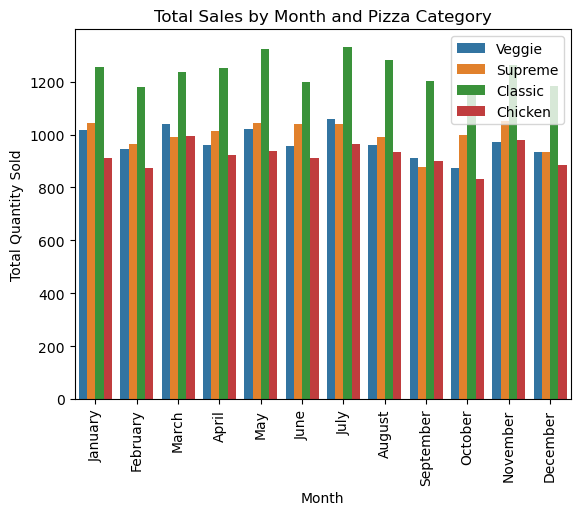

<Figure size 1000x1200 with 0 Axes>

In [237]:
grouped_data = df.groupby(['month','month_number','pizza_category']).sum()['quantity'].reset_index().sort_values('month_number')

sales_by_month_category = grouped_data.unstack()

sns.barplot(data=sales_by_month_category, x='month', y='quantity', hue='pizza_category')

plt.xlabel('Month')
plt.xticks(rotation=90)
plt.ylabel('Total Quantity Sold')
plt.title('Total Sales by Month and Pizza Category')
plt.figure(figsize = (10,12))
plt.show()

##Code above do the filtering and Visualization process 

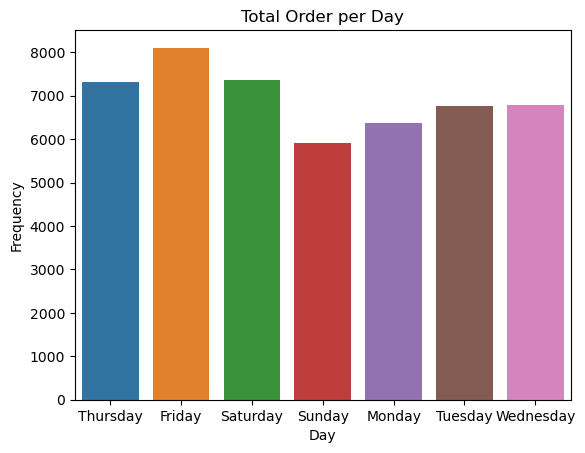

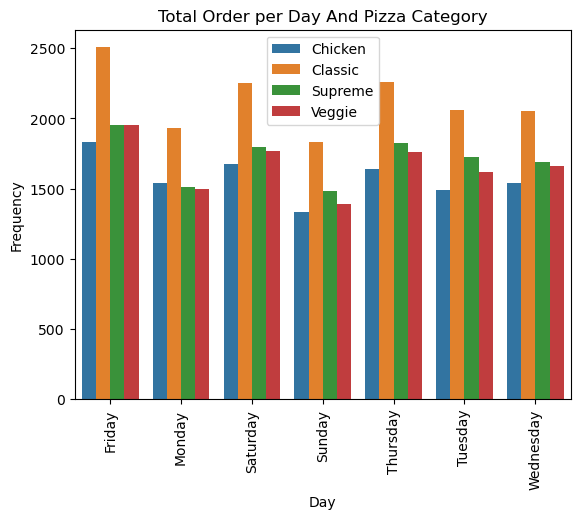

,order_day,total_order
0,Friday,8106
1,Monday,6369
2,Saturday,7355
3,Sunday,5917
4,Thursday,7323
5,Tuesday,6753
6,Wednesday,6797


In [257]:
sns.countplot(x='order_day',data=df)
plt.xticks(rotation=0)
plt.xlabel("Day",fontsize=10,color="black")
plt.ylabel("Frequency",fontsize=10,color="black")
plt.title("Total Order per Day",color="black")
plt.show()
grouped_data_day = df.groupby(['order_day','pizza_category']).sum('quantity').reset_index()
sales_by_day_category = grouped_data_day.unstack()
sns.barplot(data=sales_by_day_category, x='order_day', y='quantity', hue='pizza_category')
plt.xticks(rotation=90)
plt.xlabel("Day",fontsize=10,color="black")
plt.ylabel("Frequency",fontsize=10,color="black")
plt.title("Total Order per Day And Pizza Category",color="black")
plt.show()

total_order_day = df.groupby(['order_day']).agg(total_order=('quantity' ,'count')).reset_index().sort_values(by='order_day')
total_order_day
##Code above do the filtering and Visualization process 

### From the Weekly sales we can see the most ordered pizza is Classic category and day most ordered is Friday with total order 8106! Let see the detailed in hour belows!

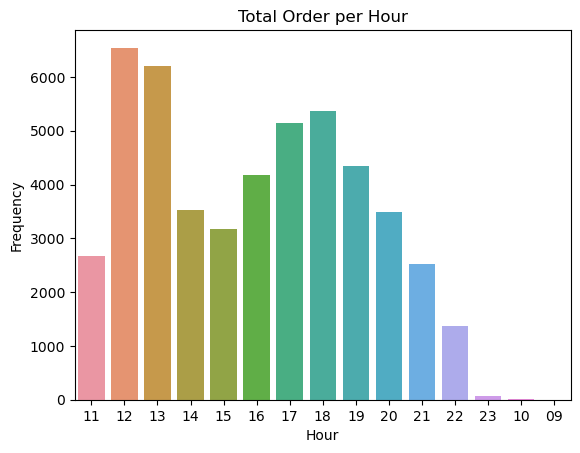

,hour,total_order
0,09,4
1,10,17
2,11,2672
3,12,6543
4,13,6203
5,14,3521
6,15,3170
7,16,4185
8,17,5143
9,18,5359


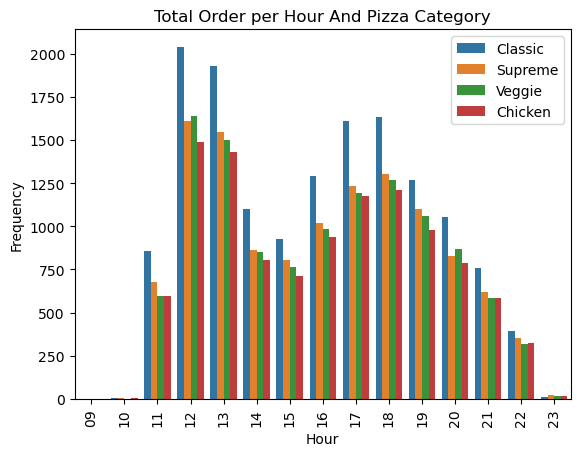

In [259]:
sns.countplot(x='hour',data=df)
plt.xticks(rotation=0)
plt.xlabel("Hour",fontsize=10,color="black")
plt.ylabel("Frequency",fontsize=10,color="black")
plt.title("Total Order per Hour",color="black")
plt.show()

total_order_hour = df.groupby(['hour']).agg(total_order=('quantity' ,'count')).reset_index()
display(total_order_hour)

grouped_data_hour = df.groupby(['hour','pizza_category']).sum()['quantity'].reset_index()
sales_by_hour_category = grouped_data_hour.unstack()
sns.barplot(data=sales_by_hour_category, x='hour', y='quantity', hue='pizza_category')
plt.xticks(rotation=90)
plt.xlabel("Hour",fontsize=10,color="black")
plt.ylabel("Frequency",fontsize=10,color="black")
plt.title("Total Order per Hour And Pizza Category",color="black")
plt.show()



##Code above do the filtering and Visualization process 

#### The data shows us people tend to order at Lunch and Dinnertime. Most ordered time is at 12:00 - 14:00 and in 17:00 - 19:00 and still the most ordered pizza is Classic, Let see which size is people often to order

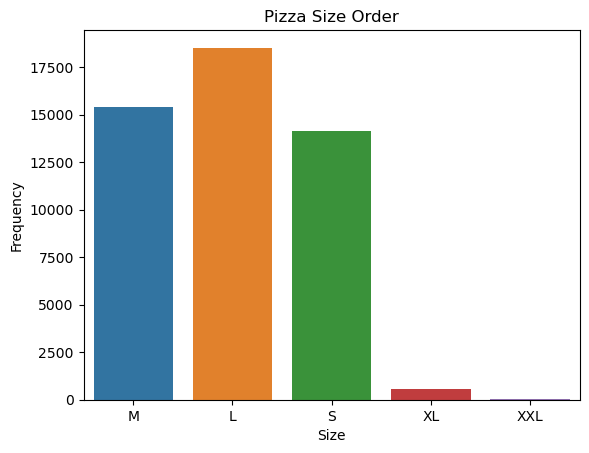

In [216]:
sns.countplot(x='pizza_size',data=df)
plt.xticks(rotation=0)
plt.xlabel("Size",fontsize=10,color="black")
plt.ylabel("Frequency",fontsize=10,color="black")
plt.title("Pizza Size Order",color="black")
plt.show()

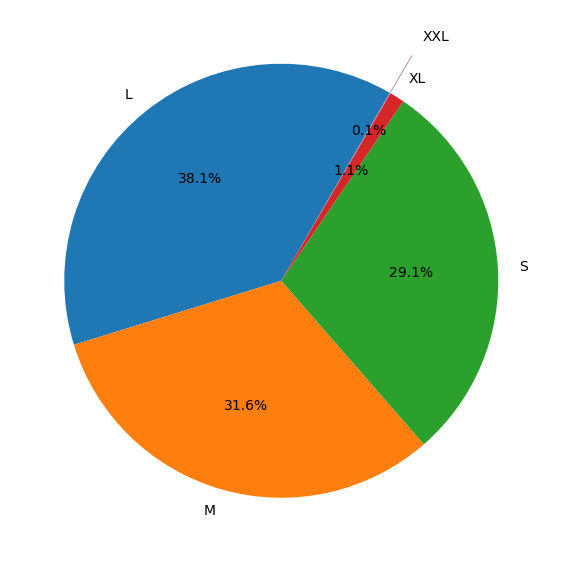

In [76]:
labels = df["pizza_size"].value_counts().index
sizes = df["pizza_size"].value_counts()
plt.figure(figsize = (7,9))
plt.pie(sizes,labels=labels,  rotatelabels=False, autopct='%1.1f%%',startangle=60,explode=(0,0,0,0,0.2))
plt.show()

#### Highest ordered pizza size is Large with 38.1% in total order and the lowest is XXL 0.1% in total order!

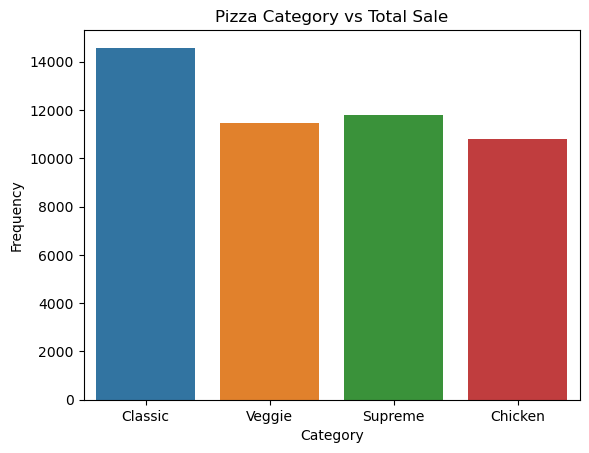

,quantity
pizza_category,
Chicken,11050
Classic,14888
Supreme,11987
Veggie,11649


In [297]:
sns.countplot(x='pizza_category',data=df)
plt.xticks(rotation=0)
plt.xlabel("Category",fontsize=10,color="black")
plt.ylabel("Frequency",fontsize=10,color="black")
plt.title("Pizza Category vs Total Sale",color="black")
plt.show()
df.groupby('pizza_category').agg({'quantity':'sum'})

#### The classic pizza is favorite amongs the people with total order 14888 Pizza!

In [299]:
most_profit = df.groupby(['pizza_category','pizza_name']).agg({'total_price':'sum',
                                                              'quantity':'sum'}).sort_values(by='quantity',ascending=False).reset_index()
display(most_profit.head())
display(most_profit.tail())

,pizza_category,pizza_name,total_price,quantity
0,Classic,The Classic Deluxe Pizza,38180.50,2453
1,Chicken,The Barbecue Chicken Pizza,42768.00,2432
2,Classic,The Hawaiian Pizza,32273.25,2422
3,Classic,The Pepperoni Pizza,30161.75,2418
4,Chicken,The Thai Chicken Pizza,43434.25,2371


,pizza_category,pizza_name,total_price,quantity
27,Supreme,The Soppressata Pizza,16425.75,961
28,Supreme,The Spinach Supreme Pizza,15277.75,950
29,Supreme,The Calabrese Pizza,15934.25,937
30,Veggie,The Mediterranean Pizza,15360.50,934
31,Supreme,The Brie Carre Pizza,11588.50,490


## Conclusion


### 0. The dataset contains pizza orders in 2015, with a total order of 48620 orders
### 1. July was the month that received the most orders with 72557 and 4301 pizza orders
### 2. The most ordered pizza is pizza in the classic category with 14579 orders
### 3. Friday is the day that has the most orders in a year with a total of 8106 pizza orders
### 4. Most orders are made during lunch and dinner hours, namely at 12:00 - 14:00 and 17:00 - 19:00
### 5. The most ordered pizza size is L size pizza with 38.1% of total orders, then M size pizza with 31.6% of total orders, then 29.1% for S size, then 1.1% for size XL and 0.1% size XXL
### 6. The most ordered pizza was The Classic Deluxe Pizza and the least ordered was The Brie Carre Pizza